In [213]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [214]:
df_WG = pd.read_csv('~/Downloads/wordbank_data_WG_Produces_en.csv')
df_WG.drop(columns=['downloaded'], inplace=True)
display(df_WG.head())

df_WS = pd.read_csv('~/Downloads/wordbank_data_WS_Produces_en.csv')
df_WS.drop(columns=['downloaded'], inplace=True)
display(df_WS.head())

,item_id,item_definition,category,8,9,10,11,12,13,14,15,16,17,18
0,34,baa baa,sounds,0.18,0.22,0.25,0.23,0.26,0.26,0.35,0.35,0.45,0.50,0.59
1,35,choo choo,sounds,0.02,0.02,0.02,0.02,0.05,0.06,0.08,0.16,0.27,0.31,0.37
2,36,cockadoodledoo,sounds,0.01,0.01,0.02,0.02,0.01,0.02,0.03,0.08,0.13,0.14,0.19
3,37,grrr,sounds,0.05,0.09,0.18,0.16,0.17,0.26,0.27,0.33,0.52,0.50,0.57
4,38,meow,sounds,0.01,0.04,0.05,0.06,0.10,0.16,0.18,0.27,0.48,0.50,0.57


,item_id,item_definition,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,baa baa,sounds,0.46,0.52,0.55,0.66,0.69,0.70,0.66,0.78,0.78,0.78,0.79,0.82,0.89,0.80,0.79
1,2,choo choo,sounds,0.27,0.32,0.39,0.51,0.56,0.60,0.67,0.71,0.76,0.84,0.81,0.85,0.92,0.85,0.88
2,3,cockadoodledoo,sounds,0.13,0.10,0.14,0.22,0.22,0.29,0.31,0.37,0.43,0.45,0.49,0.53,0.70,0.54,0.58
3,4,grrr,sounds,0.54,0.50,0.54,0.63,0.61,0.65,0.63,0.73,0.76,0.76,0.75,0.80,0.90,0.79,0.80
4,5,meow,sounds,0.49,0.47,0.55,0.67,0.69,0.75,0.76,0.80,0.86,0.88,0.88,0.91,0.96,0.91,0.92


In [215]:
# --- ASSUMPTION ---
# This script assumes you have df_WS (Words & Sentences data) loaded and ready.
# The proportion columns are assumed to be named '28', '29', and '30' (as strings).

def analyze_proportion_dip(df, age_cols=['28', '29', '30']):
    """
    Performs T-tests to compare the mean proportion acquired between 28, 29, and 30 months.
    """
    
    if not all(col in df.columns for col in age_cols):
        print(f"Error: Not all required columns ({age_cols}) found in the DataFrame.")
        return

    # Convert the proportion columns to numeric (they may be strings after the earlier DataFrame joins)
    df[age_cols] = df[age_cols].apply(pd.to_numeric, errors='coerce')
    df = df.dropna(subset=age_cols)

    # 1. Calculate Mean Proportions
    mean_28 = df[age_cols[0]].mean()
    mean_29 = df[age_cols[1]].mean()
    mean_30 = df[age_cols[2]].mean()

    print("--- Summary of Mean Proportions ---")
    print(f"Mean Proportion Acquired at {age_cols[0]} months (Peak?): {mean_28:.4f}")
    print(f"Mean Proportion Acquired at {age_cols[1]} months (Dip?):   {mean_29:.4f}")
    print(f"Mean Proportion Acquired at {age_cols[2]} months (Dip?):   {mean_30:.4f}")
    print("\n")

    # 2. Perform Paired T-tests (since the same items are measured)
    
    # Check if 28m is statistically higher than 29m
    t_28_vs_29, p_28_vs_29 = stats.ttest_rel(df[age_cols[0]], df[age_cols[1]], alternative='greater')
    
    # Check if 28m is statistically higher than 30m
    t_28_vs_30, p_28_vs_30 = stats.ttest_rel(df[age_cols[0]], df[age_cols[2]], alternative='greater')
    
    print("--- Paired T-test Results (Testing if 28m is significantly GREATER than 29m/30m) ---")
    
    print(f"28m vs 29m: T-statistic={t_28_vs_29:.3f}, P-value={p_28_vs_29:.5f}")
    if p_28_vs_29 < 0.05:
        print(f"   -> Result: Statistically significant dip from 28 to 29 months (p < 0.05).")
    else:
        print(f"   -> Result: Dip is NOT statistically significant (p >= 0.05).")
        
    print(f"28m vs 30m: T-statistic={t_28_vs_30:.3f}, P-value={p_28_vs_30:.5f}")
    if p_28_vs_30 < 0.05:
        print(f"   -> Result: Statistically significant dip from 28 to 30 months (p < 0.05).")
    else:
        print(f"   -> Result: Dip is NOT statistically significant (p >= 0.05).")

# Example Usage (replace df_WS with your actual DataFrame name)
# You may need to adjust the column names if you added suffixes earlier (e.g., '28_WS')
# analyze_proportion_dip(df_WS, age_cols=['28', '29', '30'])

In [216]:
analyze_proportion_dip(df_WS, age_cols=['28', '29', '30'])

--- Summary of Mean Proportions ---
Mean Proportion Acquired at 28 months (Peak?): 0.6932
Mean Proportion Acquired at 29 months (Dip?):   0.6210
Mean Proportion Acquired at 30 months (Dip?):   0.6314


--- Paired T-test Results (Testing if 28m is significantly GREATER than 29m/30m) ---
28m vs 29m: T-statistic=39.549, P-value=0.00000
   -> Result: Statistically significant dip from 28 to 29 months (p < 0.05).
28m vs 30m: T-statistic=31.227, P-value=0.00000
   -> Result: Statistically significant dip from 28 to 30 months (p < 0.05).


In [217]:
# --- ASSUMPTION ---
# This script assumes df_WS and df_WG have been successfully loaded and are available.
# We assume age columns are represented as strings ('8', '9', '10', etc.).

# Define the columns that should NOT be treated as age/proportion data.
METADATA_COLS = ['item_id', 'item_definition', 'category']

def get_numeric_age_columns(df, metadata_cols):
    """
    Identifies and numerically sorts columns that represent ages (by excluding metadata
    and ensuring they can be converted to integers).
    """
    # 1. Get all column names that are not in the metadata list
    potential_age_cols = df.columns.difference(metadata_cols).tolist()
    
    # 2. Filter to only include columns that are string representations of numbers
    numeric_age_cols = [col for col in potential_age_cols if str(col).isdigit()]
    
    # 3. CRITICAL: Sort these column names numerically (not alphabetically)
    # The key=int ensures '10' comes after '9', not after '1'.
    sorted_age_cols = sorted(numeric_age_cols, key=int)
    
    return sorted_age_cols

def analyze_all_adjacent_age_differences(df, inventory_name, metadata_cols):
    """
    Performs paired T-tests for every adjacent age group in the DataFrame.
    """
    print(f"\n{'='*70}")
    print(f"       ANALYZING ADJACENT MONTHLY CHANGES FOR: {inventory_name}")
    print(f"{'='*70}\n")
    
    age_cols = get_numeric_age_columns(df, metadata_cols)
    
    if len(age_cols) < 2:
        print(f"Insufficient age data found in {inventory_name}.")
        return

    # Ensure all required columns are numeric and drop rows with missing values 
    # for the age columns we will test.
    df_clean = df.copy()
    df_clean[age_cols] = df_clean[age_cols].apply(pd.to_numeric, errors='coerce')
    df_clean = df_clean.dropna(subset=age_cols)
    
    N = len(df_clean)
    print(f"Total items analyzed: {N}\n")

    results = []
    
    # Iterate through all adjacent pairs
    for i in range(len(age_cols) - 1):
        age_A = age_cols[i]
        age_B = age_cols[i+1]
        
        # Data for the comparison
        data_A = df_clean[age_A]
        data_B = df_clean[age_B]

        # Paired T-test (measures the difference between two related samples, 
        # which is appropriate here since it's the same item measured at two ages)
        # We use 'two-sided' test to detect any significant change (increase or decrease)
        t_stat, p_value = stats.ttest_rel(data_A, data_B, nan_policy='omit')
        
        # Calculate the direction of change
        mean_A = data_A.mean()
        mean_B = data_B.mean()
        
        change_direction = 'Increase' if mean_B > mean_A else ('Decrease' if mean_B < mean_A else 'No Change')
        
        # Determine significance
        is_significant = 'YES (P < 0.05)' if p_value < 0.05 else 'NO'
        
        results.append({
            'Comparison': f'{age_A}m -> {age_B}m',
            'Mean_A': f'{mean_A:.3f}',
            'Mean_B': f'{mean_B:.3f}',
            'Change': change_direction,
            'T_Statistic': f'{t_stat:.3f}',
            'P_Value': f'{p_value:.5f}',
            'Significant': is_significant
        })

    # Display results as a DataFrame for clean formatting
    results_df = pd.DataFrame(results)
    return results_df

In [218]:
print("\n*Significance is defined as P-value < 0.05 (two-sided paired T-test).")

# Analyze Words & Gestures (df_WG)
df_WG_results = analyze_all_adjacent_age_differences(df_WG, "Words & Gestures (WG)", METADATA_COLS)
df_WG_results['Inventory'] = 'WG'
df_WG_results = df_WG_results[['Inventory'] + df_WG_results.columns[:-1].tolist()]  # Reorder columns
display(df_WG_results)

# Analyze Words & Sentences (df_WS)
df_WS_results = analyze_all_adjacent_age_differences(df_WS, "Words & Sentences (WS)", METADATA_COLS)
df_WS_results['Inventory'] = 'WS'
df_WS_results = df_WS_results[['Inventory'] + df_WS_results.columns[:-1].tolist()]  # Reorder columns
display(df_WS_results)


*Significance is defined as P-value < 0.05 (two-sided paired T-test).

       ANALYZING ADJACENT MONTHLY CHANGES FOR: Words & Gestures (WG)

Total items analyzed: 396



,Inventory,Comparison,Mean_A,Mean_B,Change,T_Statistic,P_Value,Significant
0,WG,8m -> 9m,0.008,0.010,Increase,-2.874,0.00428,YES (P < 0.05)
1,WG,9m -> 10m,0.010,0.016,Increase,-7.426,0.00000,YES (P < 0.05)
2,WG,10m -> 11m,0.016,0.028,Increase,-17.838,0.00000,YES (P < 0.05)
3,WG,11m -> 12m,0.028,0.029,Increase,-2.058,0.04029,YES (P < 0.05)
4,WG,12m -> 13m,0.029,0.040,Increase,-7.037,0.00000,YES (P < 0.05)
5,WG,13m -> 14m,0.040,0.049,Increase,-11.979,0.00000,YES (P < 0.05)
6,WG,14m -> 15m,0.049,0.091,Increase,-24.841,0.00000,YES (P < 0.05)
7,WG,15m -> 16m,0.091,0.125,Increase,-11.611,0.00000,YES (P < 0.05)
8,WG,16m -> 17m,0.125,0.141,Increase,-9.770,0.00000,YES (P < 0.05)
9,WG,17m -> 18m,0.141,0.180,Increase,-23.464,0.00000,YES (P < 0.05)



       ANALYZING ADJACENT MONTHLY CHANGES FOR: Words & Sentences (WS)

Total items analyzed: 680



,Inventory,Comparison,Mean_A,Mean_B,Change,T_Statistic,P_Value,Significant
0,WS,16m -> 17m,0.081,0.100,Increase,-21.120,0.00000,YES (P < 0.05)
1,WS,17m -> 18m,0.100,0.131,Increase,-25.910,0.00000,YES (P < 0.05)
2,WS,18m -> 19m,0.131,0.194,Increase,-40.488,0.00000,YES (P < 0.05)
3,WS,19m -> 20m,0.194,0.192,Decrease,2.603,0.00945,YES (P < 0.05)
4,WS,20m -> 21m,0.192,0.244,Increase,-42.060,0.00000,YES (P < 0.05)
5,WS,21m -> 22m,0.244,0.286,Increase,-35.153,0.00000,YES (P < 0.05)
6,WS,22m -> 23m,0.286,0.372,Increase,-54.648,0.00000,YES (P < 0.05)
7,WS,23m -> 24m,0.372,0.412,Increase,-43.971,0.00000,YES (P < 0.05)
8,WS,24m -> 25m,0.412,0.469,Increase,-49.795,0.00000,YES (P < 0.05)
9,WS,25m -> 26m,0.469,0.503,Increase,-32.199,0.00000,YES (P < 0.05)



       PLOTTING MONTHLY CHANGE IN MEAN PROPORTION



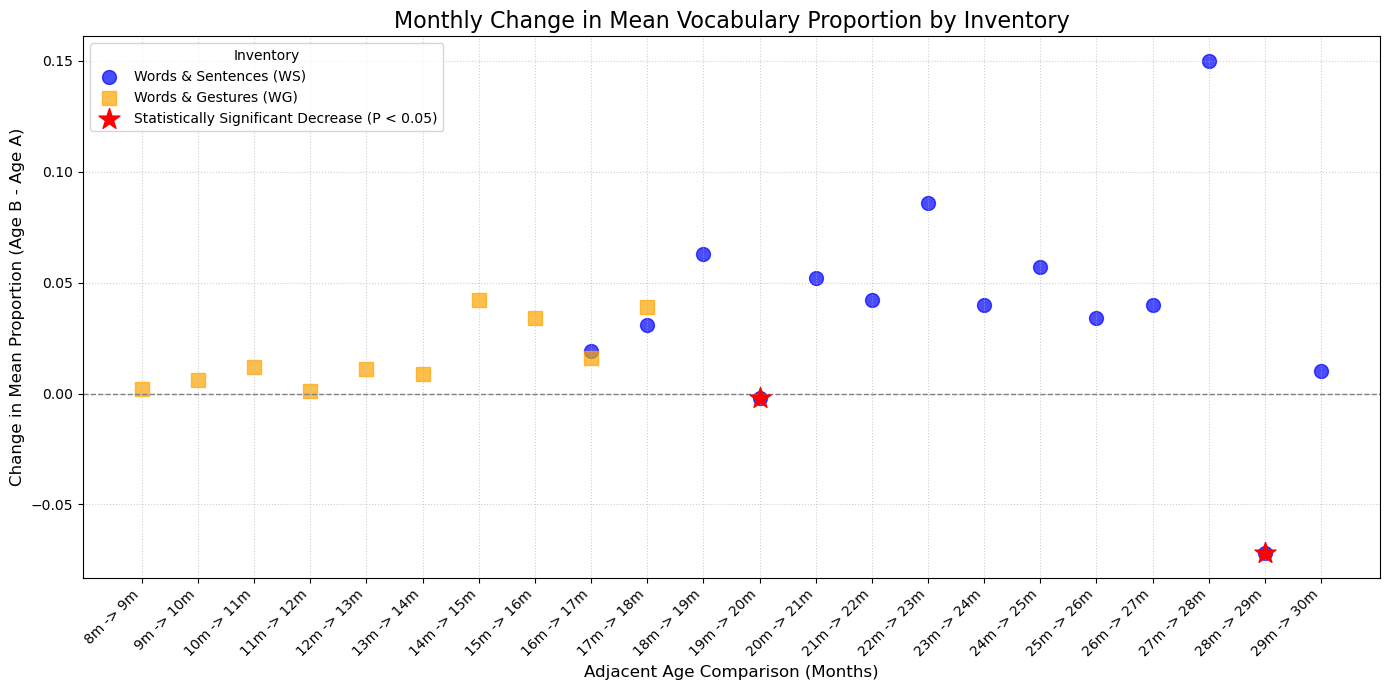

In [219]:
# ASSUMPTION: df_WS_results and df_WG_results DataFrames are already generated
# and contain the necessary columns (Comparison, Mean_A, Mean_B, P_Value).

def plot_comparison_statistics(df_ws, df_wg):
    """
    Combines WS (blue dots) and WG (orange squares) results and plots the monthly 
    change in mean proportion (Age B - Age A) against the age transition.
    Significant decreases (P < 0.05) are highlighted with red stars.
    """
    
    # 1. CRITICAL FIX: Ensure 'Inventory' column exists on the results DataFrames
    # This block handles cases where the analysis function output didn't include the column,
    # or relies on the user's manual addition (like 'WS' and 'WG').
    if 'Inventory' not in df_ws.columns:
        df_ws['Inventory'] = 'Words & Sentences (WS)'
    if 'Inventory' not in df_wg.columns:
        df_wg['Inventory'] = 'Words & Gestures (WG)'
        
    # 2. Prepare dataframes for concatenation
    # Ensure mean columns (stored as strings with f-formatting) are converted back to numeric
    # for calculation, and calculate the Mean_Change column.
    for df in [df_ws, df_wg]:
        df['Mean_A'] = pd.to_numeric(df['Mean_A'], errors='coerce')
        df['Mean_B'] = pd.to_numeric(df['Mean_B'], errors='coerce')
        df['P_Value'] = pd.to_numeric(df['P_Value'], errors='coerce')
        df['Mean_Change'] = df['Mean_B'] - df['Mean_A']
    
    # 3. Combine dataframes
    df_combined = pd.concat([df_ws, df_wg], ignore_index=True)

    # --- UPDATED LOGIC FOR X-AXIS ORDERING AND PLOTTING ---
    # 3a. Extract the starting age (e.g., 8 from '8m -> 9m') for numerical sorting
    df_combined['Start_Age_Int'] = df_combined['Comparison'].apply(
        lambda x: int(x.split('m')[0])
    )

    # 3b. Sort the unique comparison labels chronologically
    sorted_comparisons_df = df_combined[['Comparison', 'Start_Age_Int']].drop_duplicates().sort_values(by='Start_Age_Int')
    ordered_comparisons = sorted_comparisons_df['Comparison'].tolist()
    
    # 3c. Create a mapping from Comparison string to its numerical index (0, 1, 2, ...)
    comparison_to_index = {comp: i for i, comp in enumerate(ordered_comparisons)}
    
    # 3d. Apply the mapping to create the explicit X-coordinate column
    df_combined['X_Position'] = df_combined['Comparison'].map(comparison_to_index)
    
    # 4. Setup plot
    plt.figure(figsize=(14, 7))
    
    # 5. Scatterplot logic (now using 'X_Position' for x-coordinates)
    
    # WS Data (Blue circles)
    df_ws_plot = df_combined[df_combined['Inventory'].astype(str).str.contains('WS')]
    plt.scatter(
        df_ws_plot['X_Position'], # Use the explicit numerical index
        df_ws_plot['Mean_Change'], 
        color='blue', 
        label='Words & Sentences (WS)', 
        s=100, # size of dots
        alpha=0.7,
        marker='o'
    )
    
    # WG Data (Orange squares)
    df_wg_plot = df_combined[df_combined['Inventory'].astype(str).str.contains('WG')]
    plt.scatter(
        df_wg_plot['X_Position'], # Use the explicit numerical index
        df_wg_plot['Mean_Change'], 
        color='orange', 
        label='Words & Gestures (WG)', 
        s=100,
        alpha=0.7,
        marker='s' 
    )
    
    # 6. Highlight significant decreases (Red stars)
    sig_decreases = df_combined[
        (df_combined['P_Value'] < 0.05) & 
        (df_combined['Mean_Change'] < 0)
    ]
    if not sig_decreases.empty:
        plt.scatter(
            sig_decreases['X_Position'], # Use the explicit numerical index
            sig_decreases['Mean_Change'],
            color='red',
            marker='*',
            s=250, # large star marker
            label='Statistically Significant Decrease (P < 0.05)',
            zorder=10 # Ensure stars are on top
        )

    # 7. Add reference lines and labels
    plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
    
    plt.title('Monthly Change in Mean Vocabulary Proportion by Inventory', fontsize=16)
    plt.xlabel('Adjacent Age Comparison (Months)', fontsize=12)
    plt.ylabel('Change in Mean Proportion (Age B - Age A)', fontsize=12)
    plt.legend(title='Inventory', loc='best')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Set the x-ticks explicitly using the index (0, 1, 2...) and the sorted labels
    plt.gca().set_xticks(range(len(ordered_comparisons)))
    plt.gca().set_xticklabels(ordered_comparisons)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 

# --- EXECUTION ---

print(f"\n{'='*70}")
print("       PLOTTING MONTHLY CHANGE IN MEAN PROPORTION")
print(f"{'='*70}\n")
plot_comparison_statistics(df_WS_results, df_WG_results)


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# ASSUMPTION: df_WS_results and df_WG_results DataFrames are already generated
# and contain the necessary columns (Comparison, Mean_A, Mean_B, P_Value).

def prepare_and_calculate_change(df_ws, df_wg):
    """
    PREPARES the dataframes, calculates the initial Mean_Change (first derivative),
    and sets up the chronological X-axis positions.

    Returns: df_combined (with X_Position and Mean_Change), ordered_comparisons list
    """
    
    # 1. Ensure 'Inventory' column exists on the results DataFrames
    if 'Inventory' not in df_ws.columns:
        df_ws['Inventory'] = 'Words & Sentences (WS)'
    if 'Inventory' not in df_wg.columns:
        df_wg['Inventory'] = 'Words & Gestures (WG)'
        
    # 2. Prepare dataframes for calculation
    for df in [df_ws, df_wg]:
        df['Mean_A'] = pd.to_numeric(df['Mean_A'], errors='coerce')
        df['Mean_B'] = pd.to_numeric(df['Mean_B'], errors='coerce')
        df['P_Value'] = pd.to_numeric(df['P_Value'], errors='coerce')
        # Calculate Change (First Derivative)
        df['Mean_Change'] = df['Mean_B'] - df['Mean_A']
    
    # 3. Combine dataframes
    df_combined = pd.concat([df_ws, df_wg], ignore_index=True)

    # --- LOGIC FOR X-AXIS ORDERING AND PLOTTING ---
    # 3a. Extract the starting age (e.g., 8 from '8m -> 9m') for numerical sorting
    df_combined['Start_Age_Int'] = df_combined['Comparison'].apply(
        lambda x: int(x.split('m')[0])
    )

    # 3b. Sort the unique comparison labels chronologically
    sorted_comparisons_df = df_combined[['Comparison', 'Start_Age_Int']].drop_duplicates().sort_values(by='Start_Age_Int')
    ordered_comparisons = sorted_comparisons_df['Comparison'].tolist()
    
    # 3c. Create a mapping from Comparison string to its numerical index (0, 1, 2, ...)
    comparison_to_index = {comp: i for i, comp in enumerate(ordered_comparisons)}
    
    # 3d. Apply the mapping to create the explicit X-coordinate column
    df_combined['X_Position'] = df_combined['Comparison'].map(comparison_to_index)
    
    return df_combined, ordered_comparisons

def calculate_acceleration_data(df_combined):
    """
    CALCULATES the Acceleration (second derivative) from the Mean_Change column.
    """
    def calculate_acceleration(group):
        # Acceleration is the difference between the current change and the previous change.
        group['Acceleration'] = group['Mean_Change'].diff()
        return group
    
    # Need to sort explicitly by age before calculating the difference, then group by Inventory
    df_combined_sorted = df_combined.sort_values(by=['Inventory', 'Start_Age_Int'])
    df_combined = df_combined_sorted.groupby('Inventory', sort=False).apply(calculate_acceleration).reset_index(drop=True)
    
    return df_combined.dropna(subset=['Acceleration']) # Acceleration only exists from the second transition onward

def plot_monthly_change(df_combined, ordered_comparisons):
    """
    Plots the monthly change in mean proportion (First Derivative).
    """
    plt.figure(figsize=(12, 6))
    
    # WS Data (Blue circles)
    df_ws_plot = df_combined[df_combined['Inventory'].astype(str).str.contains('WS')]
    plt.scatter(
        df_ws_plot['X_Position'], 
        df_ws_plot['Mean_Change'], 
        color='blue', 
        label='Words & Sentences (WS) Change', 
        s=100, 
        alpha=0.7,
        marker='o'
    )
    
    # WG Data (Orange squares)
    df_wg_plot = df_combined[df_combined['Inventory'].astype(str).str.contains('WG')]
    plt.scatter(
        df_wg_plot['X_Position'], 
        df_wg_plot['Mean_Change'], 
        color='orange', 
        label='Words & Gestures (WG) Change', 
        s=100,
        alpha=0.7,
        marker='s' 
    )
    
    # Highlight significant decreases (Red stars)
    sig_decreases = df_combined[
        (df_combined['P_Value'] < 0.05) & 
        (df_combined['Mean_Change'] < 0)
    ]
    if not sig_decreases.empty:
        plt.scatter(
            sig_decreases['X_Position'], 
            sig_decreases['Mean_Change'],
            color='red',
            marker='*',
            s=250, 
            label='Statistically Significant Decrease',
            zorder=10 
        )

    plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
    plt.title('Monthly Change in Mean Vocabulary Proportion', fontsize=14)
    plt.ylabel('Change in Mean Proportion (Age B - Age A)', fontsize=12)
    
    # --- LEGEND FIX (Point 3) ---
    # Placing the legend outside the top right of the plot area
    plt.legend(title='Inventory', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Set the x-ticks explicitly using the index (0, 1, 2...) and the sorted labels
    plt.gca().set_xticks(range(len(ordered_comparisons)))
    plt.gca().set_xticklabels(ordered_comparisons)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_acceleration(df_accel, ordered_comparisons):
    """
    Plots the monthly acceleration (Second Derivative) as a scatterplot (Point 2).
    """
    plt.figure(figsize=(12, 6))

    # WS Data (Blue circles)
    df_ws_accel = df_accel[df_accel['Inventory'].astype(str).str.contains('WS')]
    plt.scatter(
        df_ws_accel['X_Position'], 
        df_ws_accel['Acceleration'], 
        color='blue', 
        label='WS Acceleration',
        s=100,
        marker='o'
    )

    # WG Data (Orange squares)
    df_wg_accel = df_accel[df_accel['Inventory'].astype(str).str.contains('WG')]
    plt.scatter(
        df_wg_accel['X_Position'], 
        df_wg_accel['Acceleration'], 
        color='orange', 
        label='WG Acceleration',
        s=100,
        marker='s'
    )

    plt.axhline(0, color='red', linestyle='-', linewidth=1) 
    plt.title('Monthly Acceleration (Change in Growth Rate)', fontsize=14)
    plt.xlabel('Age Transition (Comparison)', fontsize=12)
    plt.ylabel('Acceleration (Change - Previous Change)', fontsize=12)
    
    # Placing the legend outside the top right of the plot area
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True, linestyle=':', alpha=0.6)

    # Set the x-ticks explicitly. Note: the first comparison (e.g., 8m->9m) has no acceleration.
    # We plot the acceleration data frame, which has the X_Position correctly mapped.
    # However, for labels, we use the original ordered comparisons list.
    plt.gca().set_xticks(range(len(ordered_comparisons)))
    plt.gca().set_xticklabels(ordered_comparisons)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 


   STEP 1: CALCULATING CHANGE (First Derivative)



,Inventory,Comparison,Mean_A,Mean_B,Change,T_Statistic,P_Value,Significant,Mean_Change,Start_Age_Int,X_Position
0,WS,16m -> 17m,0.081,0.100,Increase,-21.120,0.00000,YES (P < 0.05),0.019,16,8
1,WS,17m -> 18m,0.100,0.131,Increase,-25.910,0.00000,YES (P < 0.05),0.031,17,9
2,WS,18m -> 19m,0.131,0.194,Increase,-40.488,0.00000,YES (P < 0.05),0.063,18,10
3,WS,19m -> 20m,0.194,0.192,Decrease,2.603,0.00945,YES (P < 0.05),-0.002,19,11
4,WS,20m -> 21m,0.192,0.244,Increase,-42.060,0.00000,YES (P < 0.05),0.052,20,12



   STEP 2: PLOTTING MONTHLY CHANGE



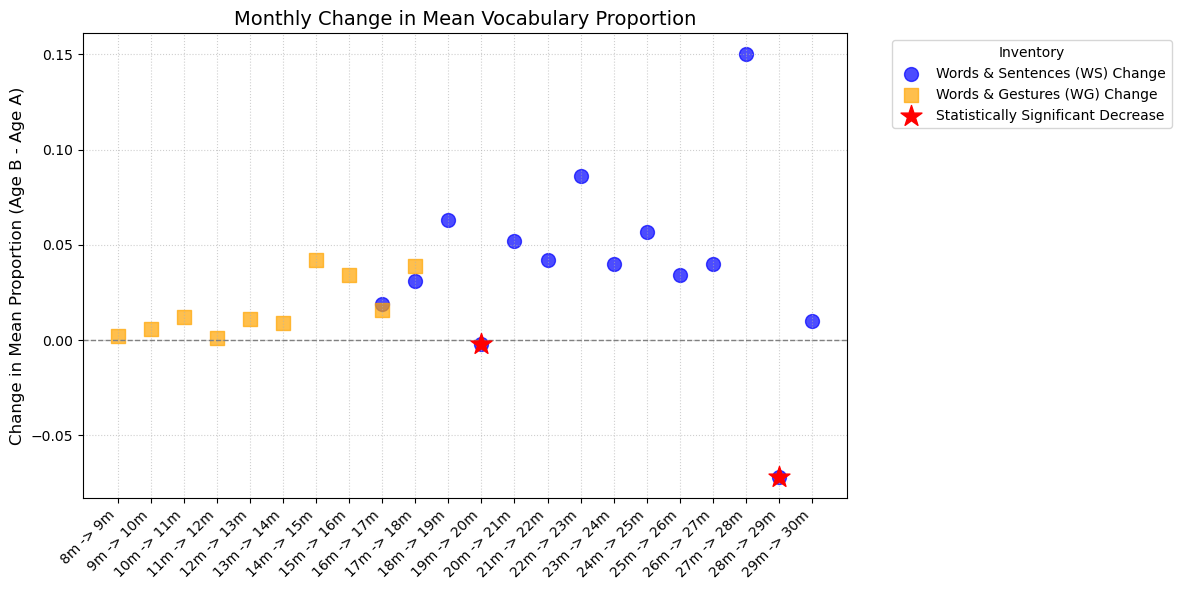

In [221]:
# --- EXECUTION ---
# The execution block is separated to show how you can run these in your notebook cells.

# Cell 1: Data Preparation
print(f"\n{'='*40}")
print("   STEP 1: CALCULATING CHANGE (First Derivative)")
print(f"{'='*40}\n")
df_combined_change, ordered_comparisons = prepare_and_calculate_change(df_WS_results, df_WG_results)
display(df_combined_change.head()) # Display combined structure

# Cell 2: Plot Monthly Change
print(f"\n{'='*40}")
print("   STEP 2: PLOTTING MONTHLY CHANGE")
print(f"{'='*40}\n")
plot_monthly_change(df_combined_change, ordered_comparisons)


   STEP 3: CALCULATING ACCELERATION (Second Derivative)



/var/folders/rp/lv2f12xj7dq5tmt1g0py659c0000gn/T/ipykernel_59022/3002835934.py:61: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined = df_combined_sorted.groupby('Inventory', sort=False).apply(calculate_acceleration).reset_index(drop=True)


,Inventory,Comparison,Mean_A,Mean_B,Change,T_Statistic,P_Value,Significant,Mean_Change,Start_Age_Int,X_Position,Acceleration
1,WG,9m -> 10m,0.010,0.016,Increase,-7.426,0.00000,YES (P < 0.05),0.006,9,1,0.004
2,WG,10m -> 11m,0.016,0.028,Increase,-17.838,0.00000,YES (P < 0.05),0.012,10,2,0.006
3,WG,11m -> 12m,0.028,0.029,Increase,-2.058,0.04029,YES (P < 0.05),0.001,11,3,-0.011
4,WG,12m -> 13m,0.029,0.040,Increase,-7.037,0.00000,YES (P < 0.05),0.011,12,4,0.010
5,WG,13m -> 14m,0.040,0.049,Increase,-11.979,0.00000,YES (P < 0.05),0.009,13,5,-0.002



   STEP 4: PLOTTING ACCELERATION



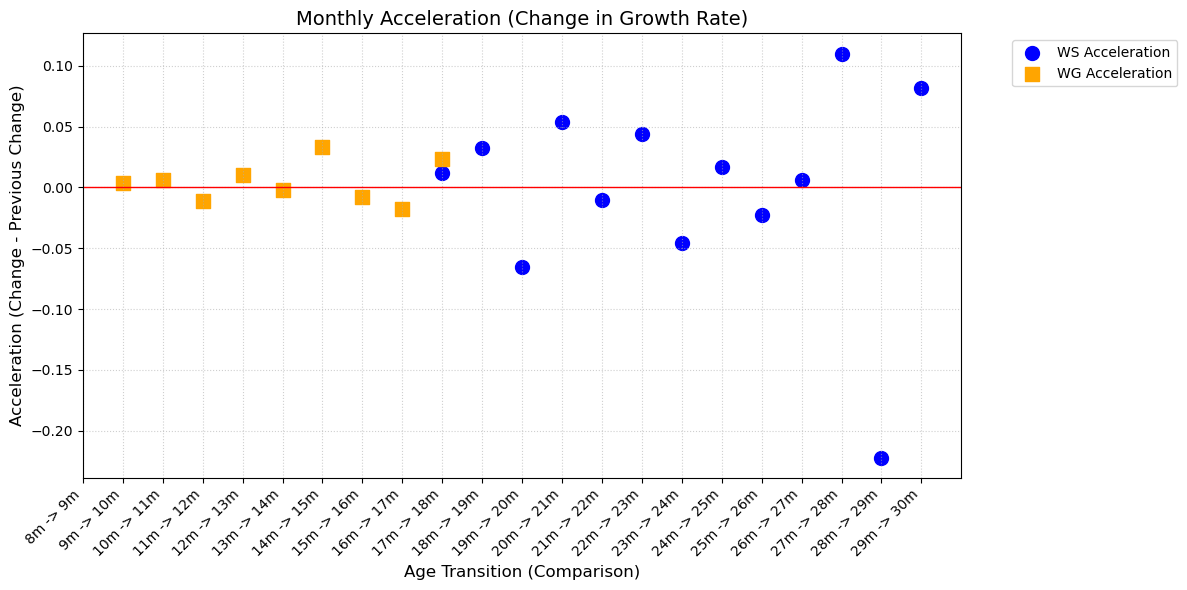

In [222]:
# Cell 3: Calculate Acceleration
print(f"\n{'='*40}")
print("   STEP 3: CALCULATING ACCELERATION (Second Derivative)")
print(f"{'='*40}\n")
df_combined_accel = calculate_acceleration_data(df_combined_change)
display(df_combined_accel.head()) # Display acceleration structure

# Cell 4: Plot Acceleration
print(f"\n{'='*40}")
print("   STEP 4: PLOTTING ACCELERATION")
print(f"{'='*40}\n")
plot_acceleration(df_combined_accel, ordered_comparisons)


In [223]:
# --- ASSUMPTION ---
# This script assumes the original dataframe df_WS is loaded and available in the environment,
# and it contains a 'category' column and age columns as strings ('27', '28', '29').

def analyze_category_contribution(df_ws):
    """
    Analyzes which word categories drive the extreme acceleration (27m->28m) 
    and deceleration (28m->29m) observed in the Words & Sentences inventory.
    """
    
    # Define the critical age columns
    age_A = '27'
    age_B = '28'
    age_C = '29'
    
    required_cols = ['category', age_A, age_B, age_C]
    
    # 1. Prepare and clean the data
    df = df_ws[required_cols].copy()
    
    # Convert age columns to numeric, coercing errors to NaN
    for col in [age_A, age_B, age_C]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    # Drop rows where the category is missing or any of the key age data points are missing
    df = df.dropna(subset=required_cols)

    # 2. Calculate the mean proportion for each category at the three key ages
    category_means = df.groupby('category')[[age_A, age_B, age_C]].mean().reset_index()

    # 3. Calculate the change for the two critical phases
    
    # Phase 1: Acceleration (27m -> 28m)
    category_means['Change_27_to_28'] = category_means[age_B] - category_means[age_A]
    
    # Phase 2: Deceleration/Dip (28m -> 29m)
    category_means['Change_28_to_29'] = category_means[age_C] - category_means[age_B]
    
    # Calculate the Acceleration/Deceleration magnitude
    # This is the difference between the two changes: (Change_B - Change_A)
    # A large negative value here indicates the sharp deceleration/dip.
    category_means['Acceleration_Diff'] = category_means['Change_28_to_29'] - category_means['Change_27_to_28']

    # 4. Format and present results
    
    # Rename columns for clarity in output
    category_means.rename(columns={
        age_A: 'Mean_27m',
        age_B: 'Mean_28m',
        age_C: 'Mean_29m'
    }, inplace=True)
    
    # Select and format final columns
    results_cols = [
        'category',
        'Mean_27m',
        'Mean_28m',
        'Mean_29m',
        'Change_27_to_28',
        'Change_28_to_29',
        'Acceleration_Diff'
    ]
    results_df = category_means[results_cols]
    
    # Order by the most severe deceleration (most negative Acceleration_Diff)
    results_df = results_df.sort_values(by='Acceleration_Diff', ascending=True)

    # Apply formatting for display
    float_cols = ['Mean_27m', 'Mean_28m', 'Mean_29m', 'Change_27_to_28', 'Change_28_to_29', 'Acceleration_Diff']
    for col in float_cols:
        results_df[col] = results_df[col].map('{:.4f}'.format)
        
    return results_df

# --- EXECUTION ---

print(f"\n{'='*90}")
print("       ANALYZING CATEGORY CONTRIBUTION TO THE 28m PEAK AND DIP (WS Inventory)")
print(f"{'='*90}\n")

# NOTE: This execution assumes df_WS is available in your environment.
category_results = analyze_category_contribution(df_WS)
display(category_results)



       ANALYZING CATEGORY CONTRIBUTION TO THE 28m PEAK AND DIP (WS Inventory)



,category,Mean_27m,Mean_28m,Mean_29m,Change_27_to_28,Change_28_to_29,Acceleration_Diff
10,household,0.5742,0.7456,0.6288,0.1714,-0.1168,-0.2882
6,food_drink,0.5862,0.7506,0.6560,0.1644,-0.0946,-0.2590
20,toys,0.6350,0.7967,0.7056,0.1617,-0.0911,-0.2528
7,furniture_rooms,0.5382,0.6964,0.6021,0.1582,-0.0942,-0.2524
12,outside,0.5626,0.7255,0.6381,0.1629,-0.0874,-0.2503
0,action_words,0.5394,0.7100,0.6393,0.1706,-0.0707,-0.2413
1,animals,0.6353,0.7863,0.7049,0.1509,-0.0814,-0.2323
5,descriptive_words,0.5148,0.6794,0.6222,0.1646,-0.0571,-0.2217
21,vehicles,0.6550,0.7950,0.7171,0.1400,-0.0779,-0.2179
14,places,0.4514,0.5936,0.5218,0.1423,-0.0718,-0.2141


In [224]:
df_WS['category'].unique()

array(['sounds', 'animals', 'vehicles', 'toys', 'food_drink', 'clothing',
       'body_parts', 'household', 'furniture_rooms', 'outside', 'places',
       'people', 'games_routines', 'action_words', 'descriptive_words',
       'time_words', 'pronouns', 'question_words', 'locations',
       'quantifiers', 'helping_verbs', 'connecting_words'], dtype=object)

In [225]:
# ASSUMPTION: df_WS is the raw Words & Sentences DataFrame and is available.
# This function replicates the category analysis to correctly identify the top 
# volatile categories internally, ensuring the plot uses the right labels.

def plot_volatile_categories(df_ws, num_top_categories=3):
    """
    Identifies the most volatile categories (largest negative Acceleration_Diff) 
    around the 28m mark and plots their mean proportion over all ages.
    """
    
    # 1. Re-run analysis to identify the most volatile categories
    age_A, age_B, age_C = '27', '28', '29'
    required_cols = ['category', age_A, age_B, age_C]
    df = df_ws[required_cols].copy()
    
    for col in [age_A, age_B, age_C]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    df = df.dropna(subset=required_cols)
    category_means_snap = df.groupby('category')[[age_A, age_B, age_C]].mean().reset_index()

    category_means_snap['Change_27_to_28'] = category_means_snap[age_B] - category_means_snap[age_A]
    category_means_snap['Change_28_to_29'] = category_means_snap[age_C] - category_means_snap[age_B]
    category_means_snap['Acceleration_Diff'] = category_means_snap['Change_28_to_29'] - category_means_snap['Change_27_to_28']

    # Get the names of the top N most volatile categories (most negative diff)
    volatile_categories = category_means_snap.sort_values(by='Acceleration_Diff', ascending=True)['category'].head(num_top_categories).tolist()
    
    print("Categories selected for plotting (most negative Acceleration_Diff):")
    for cat in volatile_categories:
        print(f" - {cat}")
    print("-" * 60)

    # 2. Prepare full time-series data
    
    # Get all numeric age columns (e.g., '8', '9', ..., '30')
    potential_age_cols = df_ws.columns.difference(['item_id', 'item_definition', 'category']).tolist()
    age_cols = sorted([col for col in potential_age_cols if str(col).isdigit()], key=int)
    
    # Filter original data to include only the volatile categories
    df_filtered = df_ws[df_ws['category'].isin(volatile_categories)].copy()
    
    # Ensure age columns are numeric for calculation
    df_filtered[age_cols] = df_filtered[age_cols].apply(pd.to_numeric, errors='coerce')
    
    # Calculate the mean proportion for the selected categories across all ages
    plot_data = df_filtered.groupby('category')[age_cols].mean().T
    plot_data.index = plot_data.index.astype(int) # Convert age index to integer for plotting

    # 3. Plotting
    plt.figure(figsize=(12, 6))
    
    for category in volatile_categories:
        plt.plot(
            plot_data.index, 
            plot_data[category], 
            marker='o', 
            linestyle='-', 
            label=f'Category: {category.replace("_", " ").title()}',
            alpha=0.7
        )

    # Highlight the 27m to 29m region with a shaded background
    plt.axvspan(26.5, 29.5, color='red', alpha=0.1, label='Volatility Region (27m-29m)')
    
    plt.title('Mean Proportion Produced Over Time for Most Volatile Categories', fontsize=16)
    plt.xlabel('Age (Months)', fontsize=12)
    plt.ylabel('Mean Proportion of Items Produced', fontsize=12)
    plt.xticks(plot_data.index)
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Legend placement fix
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')
    
    plt.tight_layout()
    plt.show()


Categories selected for plotting (most negative Acceleration_Diff):
 - household
 - food_drink
 - toys
------------------------------------------------------------


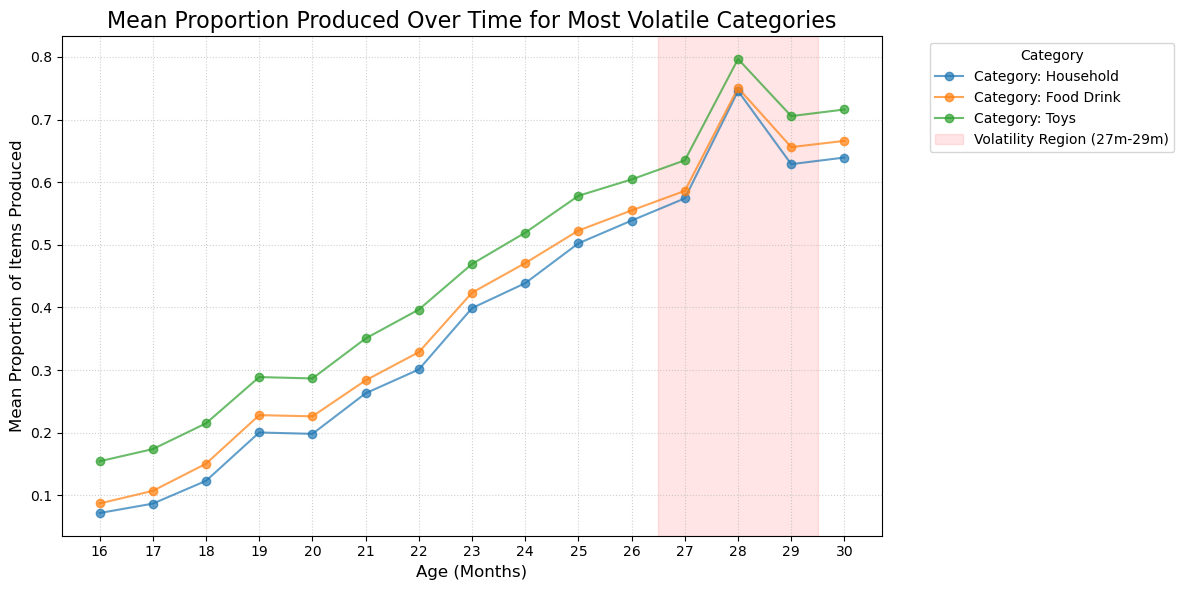

In [226]:
plot_volatile_categories(df_WS, num_top_categories=3)

In [227]:
def plot_all_categories_means(df_ws):
    """
    Plots the mean proportion over all ages for ALL categories as a scatterplot
    with connecting lines to show the trajectory over time.
    """
    
    # 1. Identify all categories
    all_categories = df_ws['category'].unique().tolist()
    
    print("Preparing time series data for all categories...")
    print("-" * 60)

    # 2. Prepare full time-series data
    
    # Get all numeric age columns (e.g., '8', '9', ..., '30')
    potential_age_cols = df_ws.columns.difference(['item_id', 'item_definition', 'category']).tolist()
    age_cols = sorted([col for col in potential_age_cols if str(col).isdigit()], key=int)
    
    # Filter original data to include only the relevant columns and ensure numeric
    df_filtered = df_ws[df_ws['category'].isin(all_categories)].copy()
    
    # Ensure age columns are numeric for calculation
    df_filtered[age_cols] = df_filtered[age_cols].apply(pd.to_numeric, errors='coerce')
    
    # Calculate the mean proportion for ALL categories across all ages
    plot_data = df_filtered.groupby('category')[age_cols].mean().T
    plot_data.index = plot_data.index.astype(int) # Convert age index to integer for plotting

    # 3. Plotting
    plt.figure(figsize=(14, 8))
    
    # Use plt.plot with solid line style
    for category in all_categories:
        plt.plot(
            plot_data.index, 
            plot_data[category], 
            marker='o', 
            linestyle='-', # Lines re-added for clarity
            label=f'Category: {category.replace("_", " ").title()}',
            alpha=0.6,
            markersize=5
        )

    # Highlight the 27m to 29m region with a shaded background
    plt.axvspan(26.5, 29.5, color='red', alpha=0.1, label='Volatility Region (27m-29m)')
    
    plt.title('Mean Proportion Produced Over Time for ALL Categories (WS Inventory)', fontsize=16)
    plt.xlabel('Age (Months)', fontsize=12)
    plt.ylabel('Mean Proportion of Items Produced', fontsize=12)
    plt.xticks(plot_data.index)
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Legend placement fix
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category', fontsize=10)
    
    plt.tight_layout()
    plt.show()

Preparing time series data for all categories...
------------------------------------------------------------


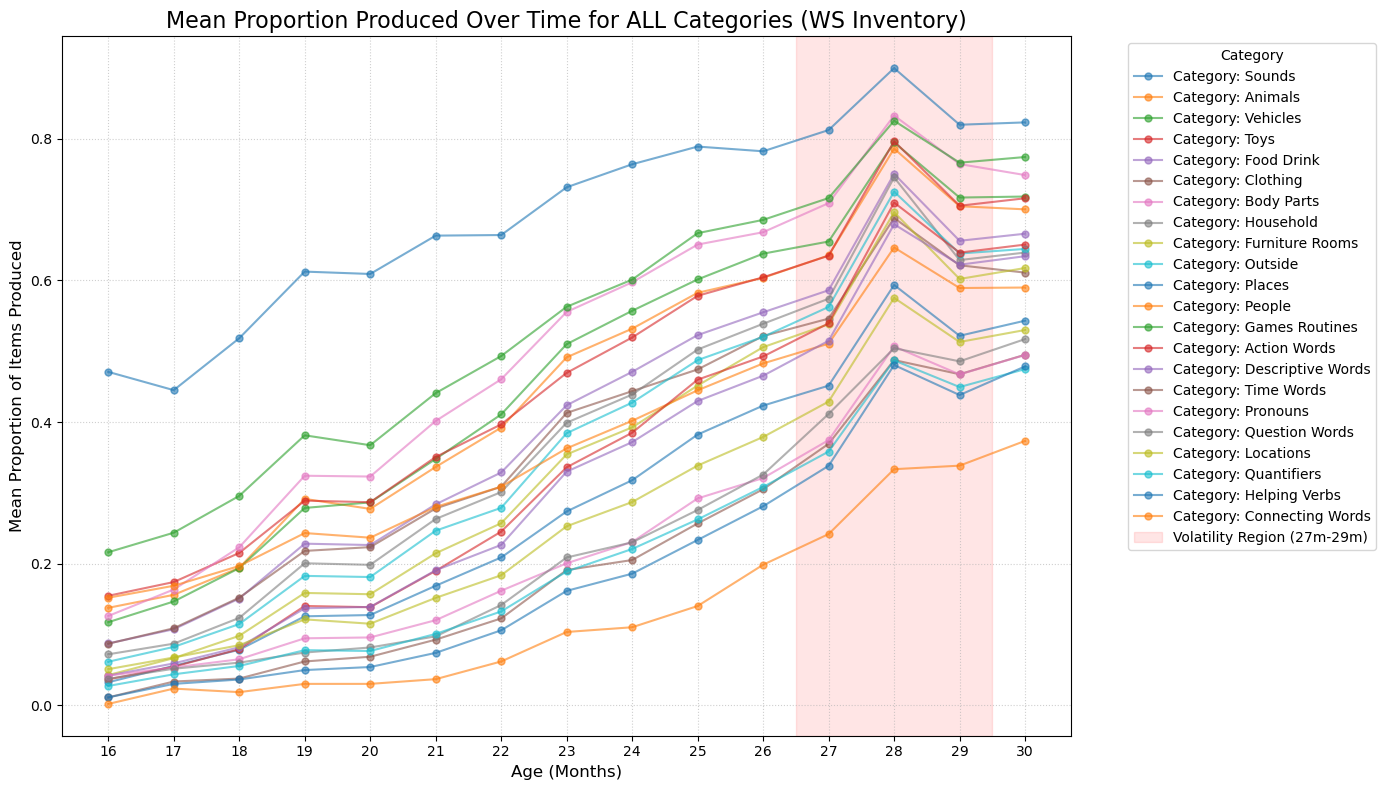

In [228]:
plot_all_categories_means(df_WS)

In [229]:
def analyze_item_volatility(df_ws, num_items=10):
    """
    Analyzes which individual items drive the extreme acceleration (27m->28m) 
    and deceleration (28m->29m) observed in the Words & Sentences inventory.
    
    The analysis calculates the 'Acceleration_Diff' (Volatility) for each item,
    where a large negative value indicates a strong spike at 28m followed by a crash at 29m.
    """
    
    # Define the critical age columns for the analysis
    age_A = '27'
    age_B = '28'
    age_C = '29'
    
    required_cols = ['item_definition', 'category', age_A, age_B, age_C]
    
    # 1. Prepare and clean the data
    df = df_ws[required_cols].copy()
    
    # Convert age columns to numeric, coercing errors to NaN
    for col in [age_A, age_B, age_C]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    # Drop rows where any of the key age data points are missing
    df = df.dropna(subset=[age_A, age_B, age_C])

    # 2. Calculate volatility metrics for each item
    
    # Phase 1: Gain (27m -> 28m)
    df['Change_27_to_28'] = df[age_B] - df[age_A]
    
    # Phase 2: Dip (28m -> 29m)
    df['Change_28_to_29'] = df[age_C] - df[age_B]
    
    # Calculate the Acceleration/Deceleration magnitude (Volatility)
    # A large negative value = strong spike (gain) followed by a strong dip (loss/crash)
    df['Acceleration_Diff'] = df['Change_28_to_29'] - df['Change_27_to_28']

    # 3. Format and present top results
    
    # Order by the most severe deceleration (most negative Acceleration_Diff)
    results_df = df.sort_values(by='Acceleration_Diff', ascending=True)
    
    # Select the top N most volatile items
    top_volatile_items = results_df.head(num_items)

    # Select and format final columns
    final_cols = [
        'item_definition',
        'category',
        age_A,
        age_B,
        age_C,
        'Change_27_to_28',
        'Change_28_to_29',
        'Acceleration_Diff'
    ]
    
    final_df = top_volatile_items[final_cols].copy()
    
    # Apply formatting for display (Keep a copy before converting for plotting)
    plot_df = final_df.copy()
    
    float_cols = [age_A, age_B, age_C, 'Change_27_to_28', 'Change_28_to_29', 'Acceleration_Diff']
    for col in float_cols:
        final_df[col] = final_df[col].map('{:.4f}'.format)
        
    # Return both the display-formatted table and the plot-ready dataframe
    return final_df, plot_df # Returning two dataframes

In [230]:
print(f"\n{'='*100}")
print("   ANALYZING THE TOP 10 INDIVIDUAL ITEMS DRIVING THE 28m PEAK AND DIP (WS Inventory)")
print(f"{'='*100}\n")

item_results, plot_data_df = analyze_item_volatility(df_WS, num_items=10)
display(item_results)


   ANALYZING THE TOP 10 INDIVIDUAL ITEMS DRIVING THE 28m PEAK AND DIP (WS Inventory)



,item_definition,category,27,28,29,Change_27_to_28,Change_28_to_29,Acceleration_Diff
145,soda/pop,food_drink,0.3100,0.6400,0.3900,0.3300,-0.2500,-0.5800
353,clown,people,0.3200,0.6100,0.3500,0.2900,-0.2600,-0.5500
240,penny,household,0.3700,0.6100,0.3500,0.2400,-0.2600,-0.5000
138,pretzel,food_drink,0.4300,0.7100,0.4900,0.2800,-0.2200,-0.5000
119,jelly,food_drink,0.3900,0.6700,0.4700,0.2800,-0.2000,-0.4800
102,coke,food_drink,0.2400,0.4800,0.2500,0.2400,-0.2300,-0.4700
118,jello,food_drink,0.3000,0.5400,0.3300,0.2400,-0.2100,-0.4500
259,watch (object),household,0.5100,0.7700,0.5900,0.2600,-0.1800,-0.4400
246,radio,household,0.3300,0.5900,0.4100,0.2600,-0.1800,-0.4400
71,bat,toys,0.4200,0.7000,0.5400,0.2800,-0.1600,-0.4400


In [231]:
def plot_item_volatility(plot_df):
    """
    Creates a grouped bar chart to visualize the magnitude of the spike (27->28m) 
    versus the crash (28m->29m) for the top volatile items.
    """
    
    # Ensure columns are numeric for plotting
    plot_df['Change_27_to_28'] = pd.to_numeric(plot_df['Change_27_to_28'], errors='coerce')
    plot_df['Change_28_to_29'] = pd.to_numeric(plot_df['Change_28_to_29'], errors='coerce')
    
    # Prepare data for grouped bar chart
    labels = plot_df['item_definition'] + ' (' + plot_df['category'] + ')'
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Bar for the Spike (27m -> 28m)
    rects1 = ax.bar(x - width/2, plot_df['Change_27_to_28'], width, 
                    label='Gain (27m → 28m)', color='#3b82f6')
    
    # Bar for the Crash (28m -> 29m)
    rects2 = ax.bar(x + width/2, plot_df['Change_28_to_29'], width, 
                    label='Loss/Crash (28m → 29m)', color='#ef4444')

    # Customization
    ax.set_ylabel('Change in Proportion Acquired', fontsize=12)
    ax.set_xlabel('Item Definition and Category', fontsize=12)
    ax.set_title('Top 10 Item Volatility: Spike vs. Crash at 28 Months', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    
    # Add a zero line for reference
    ax.axhline(0, color='gray', linewidth=0.8)
    
    ax.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

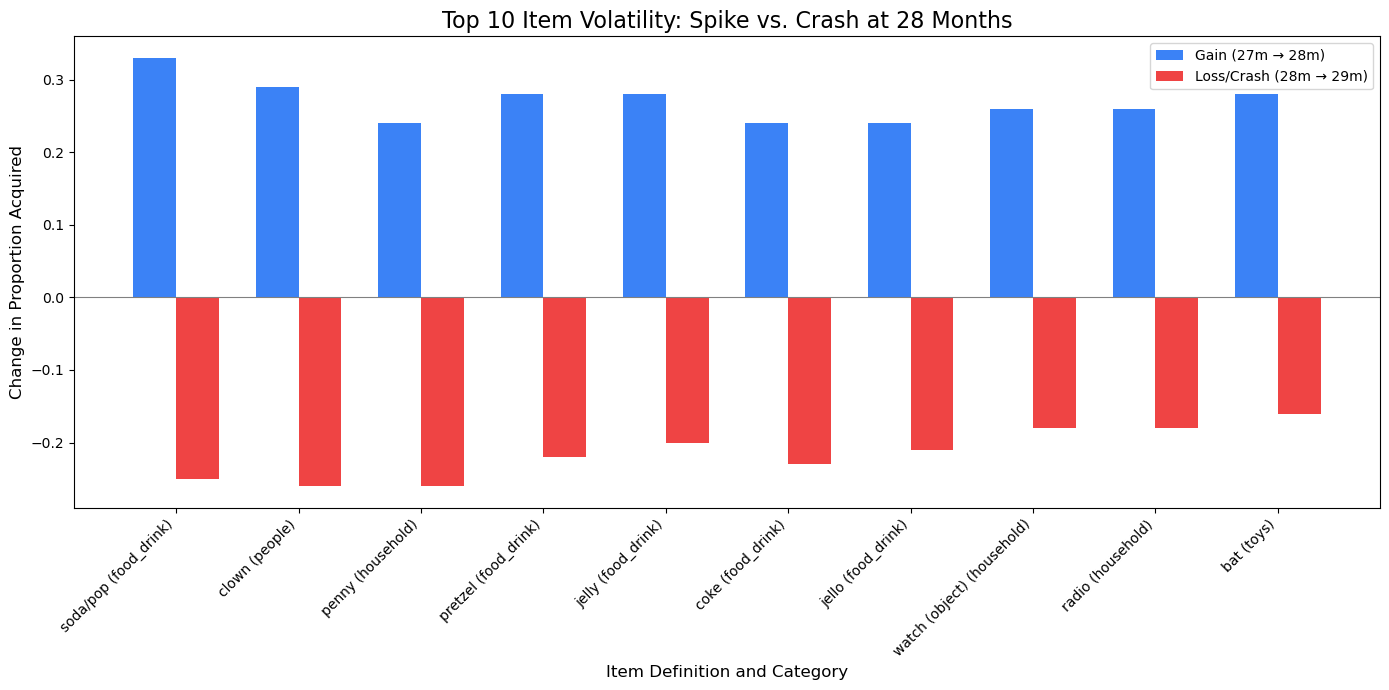

In [232]:
plot_item_volatility(plot_data_df)